# РК №1

## Панов Герман Дмитриевич

## Вариант 15. Обработка пропусков для категориального и количественного признака

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="ticks")

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

import plotly.express as px

#### Проанализируем датасет

In [103]:
data = pd.read_csv('data/googleplaystore.csv')

In [104]:
data.shape

(10841, 13)

In [105]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [106]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [107]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [109]:
total_count = data.shape[0]

print('Всего строк: {}'.format(total_count))

Всего строк: 10841


## Обработка пропусков в данных

### Обработка пропусков числового значения

In [110]:
num_cols = []

for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    
    dt = str(data[col].dtype)
    
    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(col)
        
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1474, 13.6%.


In [111]:
data_num = data[num_cols]
data_num

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


In [112]:
column = data_num[['Rating']]

In [113]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator() # где были пропуски и чем их заменили 

mask_missing_values_only = indicator.fit_transform(column)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [114]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    
    data_num_imp = imp_num.fit_transform(column) # заполним пропуски
    
    return data_num_imp[mask_missing_values_only]

In [115]:
test_num_impute('median')

array([4.3, 4.3, 4.3, ..., 4.3, 4.3, 4.3])

#### Заполним пропуски медианой

In [116]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

### Обработка пропусков категориального значения

In [117]:
cat_cols = []

for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    
    dt = str(data[col].dtype)
    
    if temp_null_count > 0 and (dt == 'object'):
        cat_cols.append(col)
        
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%.
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%.


In [118]:
data_cat = data[cat_cols]
data_cat

,Type,Content Rating,Current Ver,Android Ver
0,Free,Everyone,1.0.0,4.0.3 and up
1,Free,Everyone,2.0.0,4.0.3 and up
2,Free,Everyone,1.2.4,4.0.3 and up
3,Free,Teen,Varies with device,4.2 and up
4,Free,Everyone,1.1,4.4 and up
...,...,...,...,...
10836,Free,Everyone,1.48,4.1 and up
10837,Free,Everyone,1.0,4.1 and up
10838,Free,Everyone,1.0,2.2 and up
10839,Free,Mature 17+,Varies with device,Varies with device


In [119]:
cat_temp_data = data[['Type']]
cat_temp_data.head()

,Type
0,Free
1,Free
2,Free
3,Free
4,Free


In [120]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Free'],
       ['Free'],
       ['Free'],
       ...,
       ['Free'],
       ['Free'],
       ['Free']], dtype=object)

In [121]:
np.unique(data_imp2)

array(['0', 'Free', 'Paid'], dtype=object)

In [122]:
col = ['0', 'Free', 'Paid']

for i in col:
 count = data_imp2[data_imp2 == i].size

 print('Количество вхожденией по {} равно {}'.format(i, count))

Количество вхожденией по 0 равно 1
Количество вхожденией по Free равно 10040
Количество вхожденией по Paid равно 800


#### Поскольку нет доминирующего значения, заполним пропуски неизвестным значением

In [123]:
data['Type']= data['Type'].fillna('unk')

In [124]:
np.unique(data_imp2)

array(['0', 'Free', 'Paid'], dtype=object)

### Построим гистограмму для колонки "Rating"

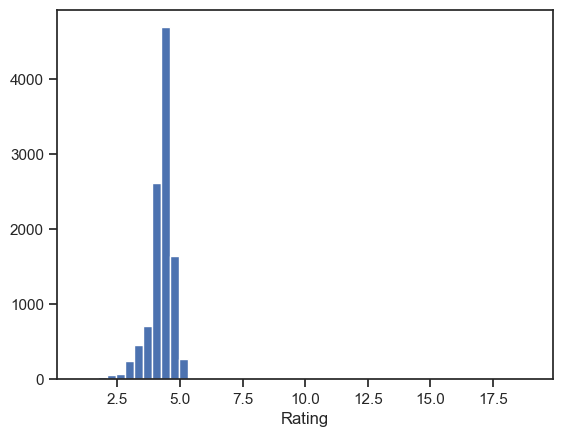

In [126]:
for col in data_num:
 plt.hist(data[col], 50)

 plt.xlabel(col)
    
 plt.show()